In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score




In [2]:
# 1. Load the Excel file
file_path = r".\Final_imputed_Filled.xlsx"
df = pd.read_excel(file_path)


In [3]:
df.head(10)

,Sr. No,Candidate Name,Email-id,Highest Qualification,Total Experience (In Years),Relevant Experience (In Years),Date of Joining,Employment Type,Job Location,Job Level (Grade),...,Billability,Skill Tagging,Skill Family,Skill Name,Candidate's Current CTC (Pre TTL Last CTC),Offer in Hand,Project Role,Offered CTC,Approvals,Client
0,1,Take dummy,Take dummy,B.Tech,6.446575,6.446575,2023-09-16,Full Time,Pune,L2,...,Yes,Super-niche,0,AUTOSAR,1500000.0,1625000,AUTOSAR Engineer,1525000.0,NaN,Open
1,2,Take dummy,Take dummy,B.Tech,7.246575,5.800000,2023-11-02,Full Time,Pune,L2,...,Yes,Super-niche,0,V&V Engineer,1050000.0,1825000,Embedded AutoSAR developers,1725000.0,NaN,Open
2,3,Take dummy,Take dummy,B.Tech,12.146575,12.146575,2023-10-25,Full Time,Pune,L2.2,...,IP,Super-niche,0,V&V Engineer,1250000.0,2225000,System Engineer,2125000.0,NaN,Open
3,4,Take dummy,Take dummy,B.Tech,12.246575,11.200000,2023-10-11,Full Time,Pune,L1.2,...,Yes,Super-niche,0,AUTOSAR,1000000.0,1825000,HW Engineer,1725000.0,NaN,Volvo
4,5,Take dummy,Take dummy,B.Tech,18.246575,18.246575,2023-10-27,Full Time,Pune,L2.2,...,Yes,Super-niche,0,Embedded Developer,1800000.0,2225000,HW Engineer,2125000.0,NaN,Volvo
5,6,Take dummy,Take dummy,B.Tech,10.746575,9.700000,2023-09-10,Full Time,Pune,L2.1,...,Yes,Super-niche,0,AUTOSAR,2600000.0,3425000,MBD,3325000.0,NaN,Volvo
6,7,Take dummy,Take dummy,B.Tech,6.246575,6.246575,2023-12-31,Full Time,Pune,L2.1,...,Yes,Super-niche,0,AUTOSAR,1510000.0,2525000,Sr. Embedded Engineer,2425000.0,NaN,Volvo
7,8,Take dummy,Take dummy,B.Tech,4.346575,3.300000,2023-10-21,Full Time,Pune,L3.1,...,IP,Super-niche,0,Project Manager,2800000.0,3725000,AUTOSAR Embedded Engineer,3625000.0,NaN,Stellantis
8,9,Take dummy,Take dummy,B.Tech,10.046575,8.600000,2023-10-25,Full Time,Pune,L3,...,Yes,Super-niche,0,Functional Safety,900000.0,3725000,AUTOSAR Embedded Engineer,3625000.0,NaN,Open
9,10,Take dummy,Take dummy,B.Tech,6.746575,5.700000,2023-10-22,Full Time,Pune,L2.1,...,Yes,Super-niche,0,V&V Engineer,1400000.0,3025000,Technical Project/Program Manager,2925000.0,NaN,Open


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Sr. No                                      337 non-null    int64         
 1   Candidate Name                              337 non-null    object        
 2   Email-id                                    337 non-null    object        
 3   Highest Qualification                       337 non-null    object        
 4   Total Experience (In Years)                 337 non-null    float64       
 5   Relevant Experience (In Years)              337 non-null    float64       
 6   Date of Joining                             337 non-null    datetime64[ns]
 7   Employment Type                             337 non-null    object        
 8   Job Location                                337 non-null    object        
 9   Job Level 

In [5]:
# 2. Drop unnecessary columns
df.drop(columns=['Sr. No', 'Candidate Name', 'Email-id', 'Approvals'], inplace=True)

# 3. Handle 'Date of Joining'
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'], errors='coerce')
df['Year of Joining'] = df['Date of Joining'].dt.year
df['Days Since Joining'] = (pd.Timestamp('today') - df['Date of Joining']).dt.days
df.drop(columns=['Date of Joining'], inplace=True)



In [6]:
df.head(10)

,Highest Qualification,Total Experience (In Years),Relevant Experience (In Years),Employment Type,Job Location,Job Level (Grade),Long Open Position,Billability,Skill Tagging,Skill Family,Skill Name,Candidate's Current CTC (Pre TTL Last CTC),Offer in Hand,Project Role,Offered CTC,Client,Year of Joining,Days Since Joining
0,B.Tech,6.446575,6.446575,Full Time,Pune,L2,Yes,Yes,Super-niche,0,AUTOSAR,1500000.0,1625000,AUTOSAR Engineer,1525000.0,Open,2023,683
1,B.Tech,7.246575,5.800000,Full Time,Pune,L2,Yes,Yes,Super-niche,0,V&V Engineer,1050000.0,1825000,Embedded AutoSAR developers,1725000.0,Open,2023,636
2,B.Tech,12.146575,12.146575,Full Time,Pune,L2.2,Yes,IP,Super-niche,0,V&V Engineer,1250000.0,2225000,System Engineer,2125000.0,Open,2023,644
3,B.Tech,12.246575,11.200000,Full Time,Pune,L1.2,Yes,Yes,Super-niche,0,AUTOSAR,1000000.0,1825000,HW Engineer,1725000.0,Volvo,2023,658
4,B.Tech,18.246575,18.246575,Full Time,Pune,L2.2,Yes,Yes,Super-niche,0,Embedded Developer,1800000.0,2225000,HW Engineer,2125000.0,Volvo,2023,642
5,B.Tech,10.746575,9.700000,Full Time,Pune,L2.1,Yes,Yes,Super-niche,0,AUTOSAR,2600000.0,3425000,MBD,3325000.0,Volvo,2023,689
6,B.Tech,6.246575,6.246575,Full Time,Pune,L2.1,Yes,Yes,Super-niche,0,AUTOSAR,1510000.0,2525000,Sr. Embedded Engineer,2425000.0,Volvo,2023,577
7,B.Tech,4.346575,3.300000,Full Time,Pune,L3.1,Yes,IP,Super-niche,0,Project Manager,2800000.0,3725000,AUTOSAR Embedded Engineer,3625000.0,Stellantis,2023,648
8,B.Tech,10.046575,8.600000,Full Time,Pune,L3,Yes,Yes,Super-niche,0,Functional Safety,900000.0,3725000,AUTOSAR Embedded Engineer,3625000.0,Open,2023,644
9,B.Tech,6.746575,5.700000,Full Time,Pune,L2.1,Yes,Yes,Super-niche,0,V&V Engineer,1400000.0,3025000,Technical Project/Program Manager,2925000.0,Open,2023,647


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Highest Qualification                       337 non-null    object 
 1   Total Experience (In Years)                 337 non-null    float64
 2   Relevant Experience (In Years)              337 non-null    float64
 3   Employment Type                             337 non-null    object 
 4   Job Location                                337 non-null    object 
 5   Job Level (Grade)                           337 non-null    object 
 6   Long Open Position                          337 non-null    object 
 7   Billability                                 337 non-null    object 
 8   Skill Tagging                               337 non-null    object 
 9   Skill Family                                337 non-null    object 
 10  Skill Name    

In [8]:
# 5. Binary encoding for 'Billability'
df['Billability'] = df['Billability'].map({'Yes': 1, 'IP': 0})
df['Long Open Position']= df['Long Open Position'].map({'Yes': 1, 'No': 0})



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Highest Qualification                       337 non-null    object 
 1   Total Experience (In Years)                 337 non-null    float64
 2   Relevant Experience (In Years)              337 non-null    float64
 3   Employment Type                             337 non-null    object 
 4   Job Location                                337 non-null    object 
 5   Job Level (Grade)                           337 non-null    object 
 6   Long Open Position                          337 non-null    int64  
 7   Billability                                 337 non-null    int64  
 8   Skill Tagging                               337 non-null    object 
 9   Skill Family                                337 non-null    object 
 10  Skill Name    

In [10]:
# Categorical columns
low_cardinality = [
    'Highest Qualification', 'Employment Type', 'Job Level (Grade)', 
    'Skill Tagging', 'Project Role'
]

high_cardinality = [
    'Job Location', 'Skill Family', 'Skill Name', 'Client'
]

numeric_cols = [
    'Total Experience (In Years)', 'Relevant Experience (In Years)', 
    'Billability', "Candidate's Current CTC (Pre TTL Last CTC)", 
    'Offer in Hand', 'Year of Joining', 'Days Since Joining'
]



In [11]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import category_encoders as ce  # pip install category_encoders

In [12]:
# Pipelines
low_card_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

high_card_pipeline = Pipeline(steps=[
    ('target', ce.TargetEncoder())
])

numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [13]:
# Column transformer
preprocessor = ColumnTransformer(transformers=[
    ('low_card', low_card_pipeline, low_cardinality),
    ('high_card', high_card_pipeline, high_cardinality),
    ('num', numeric_pipeline, numeric_cols)
])


In [14]:
# Final model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [15]:
# 1. Define X and y
X = df.drop('Offered CTC', axis=1)
y = df['Offered CTC']

# 2. Perform 90/10 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

In [16]:
# 7. Fit on training data
model_pipeline.fit(X_train, y_train)



,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('low_card', ...), ('high_card', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
# (Optional) Predict on test data to validate
y_pred = model_pipeline.predict(X_test)



In [18]:
y_pred

array([1624026.5 , 1526327.6 ,  797110.  , 4808570.  ,  764550.  ,
       2425592.66, 3943000.  , 1324476.15, 1925378.14, 1019137.78,
       1759134.05, 1926850.5 ,  766900.  , 3531622.  , 1124940.  ,
        775000.  , 2923222.2 ,  797330.  , 1125400.  , 2629696.72,
       1325000.  , 2736797.74, 2821387.64, 2217100.  , 2126000.  ,
       1823557.56,  775000.  , 2018306.15, 2524447.51, 3321576.82,
       1325000.  , 4062011.21, 1822644.79, 1323118.4 ])

In [19]:
# 14. Evaluation metrics
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 1109326247.6576767
R² Score: 0.9989320136266081


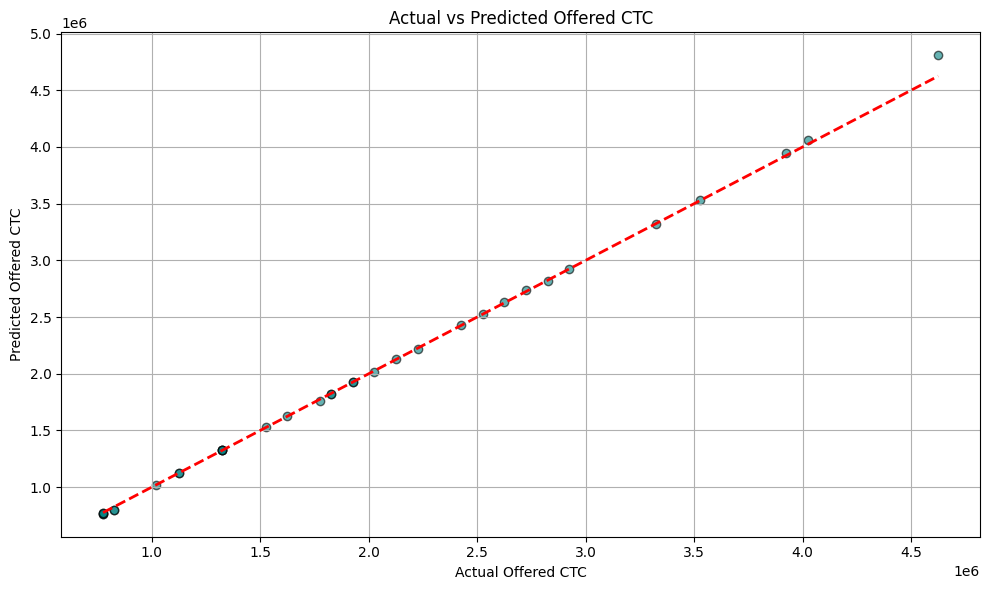

In [20]:
import matplotlib.pyplot as plt

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Actual Offered CTC')
plt.ylabel('Predicted Offered CTC')
plt.title('Actual vs Predicted Offered CTC')
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
import joblib

# Save the trained pipeline to a file
joblib.dump(model_pipeline, "hiring_model_v1.joblib")
print("Model saved as 'hiring_model_v1.joblib'")


Model saved as 'hiring_model_v1.joblib'


In [22]:
import pandas as pd
import joblib
from datetime import datetime

# Load the trained pipeline
saved_model_pipeline = joblib.load(r"C:\Users\smm931389\Desktop\Fitment_Decision\model\hiring_model_v1.joblib")  # Replace with actual path



In [23]:

# New input
input_data = {
    'Highest Qualification': ['B.Tech'],
    'Total Experience (In Years)': [6.0],
    'Relevant Experience (In Years)': [5.5],
    'Date of Joining': [pd.to_datetime('2022-08-01')],
    'Employment Type': ['Full Time'],
    'Job Location': ['Bangalore'],
    'Job Level (Grade)': ['L2.1'],
    'Billability': ['Yes'],
    'Skill Tagging': ['Super-niche'],
    'Skill Family': ['Advanced Embedded'],
    'Skill Name': ['Embedded Architect'],
    "Candidate's Current CTC (Pre TTL Last CTC)": [1600000],
    'Offer in Hand': [1700000],
    'Project Role': ['Sr. Embedded Engineer'],
    'Client': ['Volvo'],
    'Long Open Position': [pd.to_datetime('2022-01-01')]  # 👈 Must be in datetime format
}

# Create DataFrame
new_df = pd.DataFrame(input_data)

# Preprocessing
new_df['Billability'] = new_df['Billability'].map({'Yes': 1, 'IP': 0})
new_df['Year of Joining'] = new_df['Date of Joining'].dt.year
new_df['Days Since Joining'] = (pd.Timestamp.now() - new_df['Date of Joining']).dt.days

# ➕ Long Open Position logic: binary Yes/No if diff > 6 months
new_df['Long Open Position'] = new_df.apply(
    lambda row: 'Yes' if (row['Date of Joining'] - row['Long Open Position']).days > 180 else 'No',
    axis=1
)

# Drop unneeded raw date column
new_df.drop(columns='Date of Joining', inplace=True)

# Reorder columns to match model's input
expected_cols = [
    'Highest Qualification', 'Total Experience (In Years)', 'Relevant Experience (In Years)',
    'Employment Type', 'Job Location', 'Job Level (Grade)', 'Long Open Position',
    'Billability', 'Skill Tagging', 'Skill Family', 'Skill Name',
    "Candidate's Current CTC (Pre TTL Last CTC)", 'Offer in Hand',
    'Project Role', 'Client', 'Year of Joining', 'Days Since Joining'
]
new_df = new_df[expected_cols]


In [24]:
# Predict
predicted_ctc = saved_model_pipeline.predict(new_df)[0]

# Result
print(f"💰 Predicted Offered CTC: ₹{round(predicted_ctc):,}")


💰 Predicted Offered CTC: ₹1,595,240


## Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate RMSE with negative RMSE scoring (scikit-learn returns negative RMSE)
neg_rmse_scores = cross_val_score(model_pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv)
rmse_scores = -neg_rmse_scores

# Evaluate R² scores
r2_scores = cross_val_score(model_pipeline, X, y, scoring='r2', cv=cv)

# Print results
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))
print("\nCross-Validation R² Scores:", r2_scores)
print("Average R²:", np.mean(r2_scores))


Cross-Validation RMSE Scores: [ 25332.80166219  31952.69923388 139458.32985868  77026.63603701
  63435.72154826]
Average RMSE: 67441.23766800271

Cross-Validation R² Scores: [0.9992243  0.99914978 0.98693512 0.99542887 0.99687588]
Average R²: 0.9955227880483326


In [26]:
import joblib

# Assuming your X_train is the training feature DataFrame
joblib.dump(X_train, "X_train_df.joblib")


['X_train_df.joblib']